大家好，这篇是有关台大机器学习课程作业二的详解，题目同Coursera。

我的github地址：  
https://github.com/Doraemonzzz

个人主页：  
http://doraemonzzz.com/

作业地址:  
https://www.csie.ntu.edu.tw/~htlin/course/ml15fall/

参考资料:  
https://blog.csdn.net/a1015553840/article/details/51085129  
http://www.vynguyen.net/category/study/machine-learning/page/6/  
http://book.caltech.edu/bookforum/index.php  
http://beader.me/mlnotebook/

#### Problem 1

这一题和下一题就是learning from data第一章的Exercise 1.13

错误有两种，一种是“去真”:$\lambda\mu$，另一种是“取伪”：$(1-\lambda)(1-\mu)$，所以犯错的概率一共$\lambda\mu+(1-\lambda)(1-\mu)$  

#### Problem 2

$$
P=\lambda\mu+(1-\lambda)(1-\mu)=\lambda\mu+1-\mu-\lambda+\lambda\mu=1-\lambda+(2\lambda-1)\mu
$$
所以当$\lambda=\frac 1 2$时，$P=1-\lambda$，此时和$\mu$独立

#### Problem 3

这题就是learning from data第二章的Problem 2.12

在此回顾下公式
$$
E_{out}(g)\le E_{in}(g)+\sqrt {\frac 8 N ln(\frac {4({(2N)}^{d_{vc}}+1)} \delta )}的概率大于等于1-\delta
$$
回到这题，题目中$\delta =0.05,\sqrt {\frac 8 N ln(\frac {4({(2N)}^{d_{vc}}+1)} \delta )}=0.05$
这个方程直接解的话不好解，可以作图看一下

In [1]:
import math
import matplotlib.pyplot as plt

delta=0.05
dvc=10

def f(N):
    return (8/N*math.log(4*((2*N)**dvc+1)/delta))**0.5-0.05

n=1
while(True):
    if(f(n)<=0):
        break
    else:
        n+=1

print(n)

452957


#### Problem 4
这题和下面一题就是learning from data第二章的Problem 2.20，注意这里多了Variant VC bound

我们注意到(d),(e)左右两边都有$\epsilon$，所以这里要处理一下。

先看(d)，令$a=\frac 1 N,b=ln{\frac {6m_H(2N)}\delta}$，那么不等式可以化为
$$
\epsilon\le \sqrt{2a\epsilon+ab}
\\两边平方可得
\\\epsilon^2\le2a\epsilon+ab
\\(\epsilon-a)^2\le ab+a^2
\\ -\sqrt{ab+a^2}\le \epsilon-a\le\sqrt{ab+a^2}
\\a-\sqrt{ab+a^2}\le \epsilon\le a+\sqrt{ab+a^2}
\\这里只要考虑上界
\\\epsilon\le a+\sqrt{ab+a^2}
\\将a=\frac 1 N,b=ln{\frac {6m_H(2N)}\delta}带入可得
\\\epsilon\le \frac1N+\sqrt{\frac{1}{N^2}+\frac{1}{N}ln{\frac {6m_H(2N)}\delta}}
$$
对于(e)，令$a=\frac 1 {2N},b=ln{\frac {4m_H(N^2)}\delta}$，那么不等式可以化为
$$
\epsilon\le \sqrt{a(4\epsilon(1+\epsilon)+b)}
\\两边平方可得
\\\epsilon^2\le4a\epsilon(1+\epsilon)+ab
\\(1-4a)\epsilon^2-4a\epsilon\le ab
\\注意这里我们只要考虑N很大的情形，所以1-4a=1-\frac 2N>0
\\(1-4a)(\epsilon-\frac {2a}{1-4a})^2\le ab+\frac{4a^2}{1-4a}
\\(\epsilon-\frac {2a}{1-4a})^2\le\frac{ab+\frac{4a^2}{1-4a}}{1-4a}
\\ -\sqrt{\frac{ab+\frac{4a^2}{1-4a}}{1-4a}}\le\epsilon-\frac {2a}{1-4a}\le\sqrt{\frac{ab+\frac{4a^2}{1-4a}}{1-4a}}
\\这里只要考虑上界，因此
\\ \epsilon\le \sqrt{\frac{ab+\frac{4a^2}{1-4a}}{1-4a}}+\frac {2a}{1-4a}
=\sqrt{\frac{ab}{1-4a}+\frac{4a^2}{(1-4a)^2}}+\frac {2a}{1-4a}
\\将a=\frac 1 {2N},b=ln{\frac {4m_H(N^2)}\delta}带入可得
\\ \epsilon\le \sqrt{\frac{ln{\frac {4m_H(N^2)}\delta}}{2(N-2)}+\frac{1}{(N-2)^2}}+\frac{1}{(N-2)^2}
$$

这里还有一个要注意的点，这里老师希望我们使用$m_\mathcal{H}(N)$的上界为$N^{d_{vc}}$，因此
$$
\\ln(m_\mathcal{H}(N))\le d_{vc}ln(N)
$$
后面我们作图处理下

In [1]:
from scipy.special import comb
from math import log
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

dvc=50
delta=0.05

#计算lnm(N)
def lnm(n):
    s=dvc*log(n)
    return s

#Original VC-bound
def f1(n):
    result=(8/n)*(log(4/delta)+lnm(2*n))
    result=result**0.5
    return result

#Variant VC bound
def f2(n):
    result=(16/n)*(log(2/(delta**0.5))+lnm(n))
    result=result**0.5
    return result

#Rademacher Penalty Bound
def f3(n):
    k1=(2/n)*(log(2*n)+lnm(n))
    k2=(2/n)*log(1/delta)
    k3=1/n
    result=k1**0.5+k2**0.5+k3
    return result

#Parrondo and Van den Broek
def f4(n):
    k1=1/n
    k2=1/(n**2)+(1/n)*(log(6/delta)+lnm(2*n))
    k2=k2**0.5
    result=k1+k2
    return result

#Devroye
def f5(n):
    k1=1/((n-2)**2)
    k2=(log(4/delta)+lnm(n**2))/(2*(n-2))+1/(n-2)
    k2=k2**0.5
    result=k1+k2
    return result

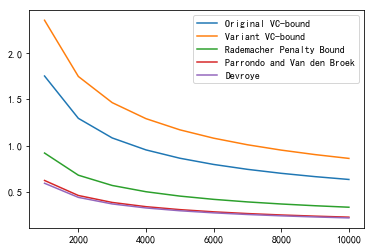

In [2]:
#产生点集
import numpy as np
x=np.arange(1000,10001,1000)

y1=[f1(i) for i in x]
y2=[f2(i) for i in x]
y3=[f3(i) for i in x]
y4=[f4(i) for i in x]
y5=[f5(i) for i in x]

#作图
plt.plot(x,y1,label="Original VC-bound")
plt.plot(x,y2,label="Variant VC-bound")
plt.plot(x,y3,label="Rademacher Penalty Bound")
plt.plot(x,y4,label="Parrondo and Van den Broek")
plt.plot(x,y5,label="Devroye")
plt.legend()
plt.show()

可以看到Parrondo and Van den Broek以及Devroye非常接近，我们再仔细看一下

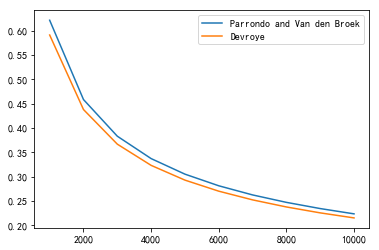

In [3]:
plt.plot(x,y4,label="Parrondo and Van den Broek")
plt.plot(x,y5,label="Devroye")
plt.legend()
plt.show()

因此n=10000时，Devroye给出的上界最小

#### Problem 5
和上题一致，我们依旧作图看一下

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in double_scalars
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in long_scalars
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in true_divide
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in long_scalars


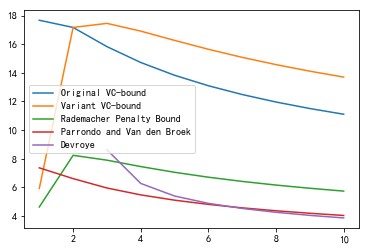

In [4]:
#产生点集
import numpy as np
x=np.arange(1,11)

y1=[f1(i) for i in x]
y2=[f2(i) for i in x]
y3=[f3(i) for i in x]
y4=[f4(i) for i in x]
y5=[f5(i) for i in x]

#作图
plt.plot(x,y1,label="Original VC-bound")
plt.plot(x,y2,label="Variant VC-bound")
plt.plot(x,y3,label="Rademacher Penalty Bound")
plt.plot(x,y4,label="Parrondo and Van den Broek")
plt.plot(x,y5,label="Devroye")
plt.legend()
plt.show()

可以看到n=5时，Parrando and Van den Broek给出的上界最小。  
这题以及上一题可以直接计算，不过我比较喜欢作图比较，感觉更清晰一些。

#### Problem 6

这题和learning from data第二章的Problem 2.3(a)类似

第一种情形为$-1,1-1$或者$1,-1,1$，即区间$[l,r]$内部有元素，且区间$[l,r]$两侧均有元素。这种情形只要在$N$个点之间的$N-1$个间隔中挑选出两个即可，所以这种情形共有$2C_{N-1}^2=(N-1)(N-2)$，乘以2是因为$[l,r]$内部可以为-1，也可以为1。

第二种情形为$-1,1$或者$1,-1$的，即区间$[l,r]$内部有元素，一侧没有元素。这种情形只要在$N$个点之间的$N-1$个间隔中挑选出一个即可，所以这种情形共有$2(N-1)=2N-2$，乘以2依旧是因为$\pm 1$的关系。

第三种情形为$1$或者$-1$，因此有2种情形。

因此
$$
m_{\mathcal{H}}(N)=(N-1)(N-2)+2N-2+2=N^2-N+2
$$

#### Problem 7

接着上题，注意
$$
m_{\mathcal{H}}(3)=3^2-3+2=8=2^3
\\m_{\mathcal{H}}(4)=4^2-4+2=14<2^4
$$
因此$d_{vc}=3$

#### Problem 8

做映射$y=\sqrt {x_1^2+ x_2^2}$，所以这个问题可以化为类似Problem 6的问题，但用我之前的思路考虑比较麻烦，这里用另一种思路。注意这里两圆之间的部分为$+1$，因此问题为$N$个点之间以及两侧$N+1$个间隔中挑选2个，最后要需要考虑全$-1$的情形，因此
$$
m_H (N)=C_{N+1}^2+1
$$

#### Problem 9
这题就是learning from data第二章的Problem 2.16，结论为$d_{vc}=D+1$

这里分两步证明:

(a)存在$D+1$个点可以被shatter

(b)任意$D+2$个点无法被shatter



(a)记$y_j=\sum_{i=0}^Dc_ix_j^i$，现在取$D+1$个点，$x_1,x_2...x_{D+1},x_j=j$

那么
$$
\left(\begin{matrix}
y_1\\
y_2\\
...\\
y_{D+1}
\end{matrix}
\right)
=
\left(
\begin{matrix}
\sum_{i=0}^Dc_ix_1^i\\
\sum_{i=0}^Dc_ix_2^i\\
...\\
\sum_{i=0}^Dc_ix_{D+1}^i
\end{matrix}
\right)
=
\left(
\begin{matrix}
1&1&1&...&1\\
1&2&2^2&...&2^{D}\\
1&3&3^2&...&3^{D}\\
...&...&...&...&...&\\
1&(D+1)&(D+1)^2&...&(D+1)^D
\end{matrix}
\right)
\times
\left(
\begin{matrix}
c_0\\
c_1\\
...\\
c_D
\end{matrix}
\right)\\
$$
我们知道
$$
\left(
\begin{matrix}
1&1&1&...&1\\
1&2&2^2&...&2^{D}\\
1&3&3^2&...&3^{D}\\
...&...&...&...&...&\\
1&(D+1)&(D+1)^2&...&(D+1)^D
\end{matrix}
\right)对应的行列式为范德蒙行列式，不为0
$$
那么对任意的$y=(y_1,y_2,...,y_{D+1})^T$
$$
\left(
\begin{matrix}
1&1&1&...&1\\
1&2&2^2&...&2^{D}\\
1&3&3^2&...&3^{D}\\
...&...&...&...&...&\\
1&(D+1)&(D+1)^2&...&(D+1)^D
\end{matrix}
\right)
\times
\left(
\begin{matrix}
c_0\\
c_1\\
...\\
c_D
\end{matrix}
\right)
=
\left(\begin{matrix}
y_1\\
y_2\\
...\\
y_{D+1}
\end{matrix}
\right)
$$
关于$c=(c_0,c_1,...c_D)^T$有解，因此存在$D+1$个点可以被shatter

(b)记$z_j=(1,x_j,x_j^2...x_j^{D})\in R^{D+1}$，那么现在任取$D+2$个点$x_1,x_2...x_{D+2}$，对应可以得到$z_1,z_2...z_{D+2}$。$R^{D+1}$空间任意$D+2$个点必然线性相关，所以不妨设$z_{D+2}$可以被线性表出，注意$c=(c_0,c_1,...c_D)^T$
$$
z_{D+2}=\sum_{i=1}^{D+1}k_iz_i\\
c^Tz_{D+2}=\sum_{i=1}^{D+1}c^Tk_iz_i\\
sign(c^Tz_{D+2})=sign(\sum_{i=1}^{D+1}k_ic^Tz_i)
$$
也就是说$z_{D+2}$的分类被$z_1,z_2...z_{D+1}$确定，那么
$(sign(z_1),sign(z_2)...sign(z_{D+1}),-sign(z_{D+2}))$这种情形必然无法被划分出来，因此$d_{vc}\le D+1$

结合(a),(b)我们可得
$$
d_{vc}=D+1
$$

#### Problem 10

对于$d$维决策树，我们可以理解为将区域划分为$2^d$个互相独立的区域，每个区域可以表示$+1$或者$-1$，所以一共可以表示出$2^{2^d}$种，因此
$$
d_{vc}=2^d
$$


#### Problem 11

这题的答案是$+\infty$，题目挺有意思的，有一题类似的题目可以参考learning from data的Problem 2.18。

我们先看题目，乍一看挺复杂的，我们先考虑简单一点的情况，即$\alpha x$为整数的情形：
$$
要使得h_{\alpha}(x)为1，那么|(αx) mod\ 4 − 2| − 1>0
\\因此(αx) mod\ 4=0
\\要使得h_{\alpha}(x)为-1，那么|(αx) mod\ 4 − 2| − 1<0
\\因此(αx) mod\ 4=2
$$
接着考虑一般情形:
$$
要使得h_{\alpha}(x)为1，那么|(αx) mod\ 4 − 2| − 1>0
\\因此(αx) mod\ 4>3
\\或0\le(αx) mod\ 4<1
\\要使得h_{\alpha}(x)为-1，那么|(αx) mod\ 4 − 2| − 1<0
\\因此1<(αx) mod\ 4<3
$$
简单来说，当$(\alpha x)\ mod 4$处于1到3时$h_{\alpha}(x)$为$-1$，否则为$+1$。

接下来，结合0,2这两个临界点以及上述结论，我们这样构造$\alpha$以及$x$:

任取$(y_1,...,y_N)\in \{-1,+1\}^N$，我们构造这样一个$z=(z_1,...,z_N)$，使得
$$
当y_i=+1时，z_i=0
\\ 当y_i=-1时，z_i=2
\\这一步可以结合我们之前所说的0,2两个特殊情形理解
$$
现在取
$$
\alpha=0.z_1z_2...z_N\\
x=(x_1 , . . . , x_N), x_n =10^n
$$
那么
$$
x_1\times \alpha=z_1 .\ z_{2}...z_{N}
\\x_i\times \alpha=z_1z_2...z_{i-1}z_i\ .\ z_{i+1}...z_{N}(i\ge2)
$$
首先有一个很显然的结论
$$
z_1z_2...z_{i-1}z_i\ mod\ 4= z_{i-1}z_i\ mod\ 4
$$
这是因为100的倍数模4为0，但这里因为$z_i\in \{0,2\}$，事实上有以下更强的结论
$$
z_1z_2...z_{i-1}z_i\ mod\ 4= z_{i-1}z_i\ mod\ 4=z_i\ mod\ 4
$$
这是因为
$$
z_{i-1}z_i\ mod\ 4=
 \begin{cases}
z_i\ mod \ 4(z_{i-1}=0)
 \\(20+z_i)\ mod \ 4=z_i\ mod \ 4(z_{i-1}=2)
 \end{cases}
$$
因此
$$
（x_1\times \alpha）\ mod\ 4=z_1 .\ z_{2}...z_{N}\ mod\ 4
\\(x_i\times \alpha)\ mod\ 4=z_1z_2...z_{i-1}z_i\ .\ z_{i+1}...z_{N}\ mod\ 4=z_i\ .\ z_{i+1}...z_{N}\ mod\ 4(i\ge2)
\\这两式可以统一为
\\(x_i\times \alpha)\ mod\ 4=z_i\ .\ z_{i+1}...z_{N}\ mod\ 4
\\进一步，我们有
\\ z_i\le (x_i\times \alpha)\ mod\ 4<z_i+1
\\当z_i=0时，0\le (x_i\times \alpha)\ mod\ 4<1
\\当z_i=2时，2\le (x_i\times \alpha)\ mod\ 4<3
$$
回忆我们之前的结论以及假设
$$
当(\alpha x)\ mod 4处于1到3时，h_{\alpha}(x)=-1，否则h_{\alpha}(x)=1
\\当y_i=+1时，z_i=0
\\ 当y_i=-1时，z_i=2
$$
所以
$$
h_{\alpha}(x_i)=1=y_i(z_i=0)
\\h_{\alpha}(x_i)=-1=y_i(z_i=2)
$$
所以任意$x=(x_1 , . . . , x_N)$均可以被shatter，因此
$$
d_{vc}=+\infty
$$

#### Problem 12

分两步考虑，第一步先考虑前$i$个点，这$i$个点最多可以区分出$2^i$种，对于剩下的$N-i$个点，最多可以被区分出$m_{\mathcal{H}}(N-i)$种。那么
$$
m_{\mathcal{H}}(N)\le2^im_{\mathcal{H}}(N-i)(i=1,2,...N-1)
$$
因此
$$
m_{\mathcal{H}}(N)\le {min}_{1\le i\le N-1}2^im_{\mathcal{H}}(N-i)(i=1,2,...N-1)
$$
因此结论成立

#### Problem 13

这题乍一看挺复杂的，其实想的简单一点就行。

我们知道$m_H (N)$要么等于$2^N$，要么有一个多项式的上界，根据这两点，除了$2^{\lfloor \sqrt N \rfloor}$不可能成为$m_H (N)$

#### Problem 14

这一题以及下一题均可以参考learning from data的Problem 2.13 

(b)首先有直觉反应：
$$
如果A\subseteq B,那么d_{vc}(A)\le d_{vc}(B)
$$
所以猜测
$$
0\le dvc (\cap _{k=1}^KH_k)\le {min}\{(d_{vc}(H_k))\}_{k=1}^K
$$
$0\le d_{vc} (\cap _{k=1}^KH_k)$是显然的，另一边使用反证法，记$d_1=d_{vc} (\cap _{k=1}^KH_k),d_2={min}\{(d_{vc}(H_k))\}_{k=1}^K$

若$d_1\ge d_2+1$，那么$\cap _{k=1}^KH_k$可以shatter $d_2+1$个点，那么至少存在一个$H_i(i=1...k)$，使得$H_i$也可以shatter $d_2+1$个点，这就与$d_2={min}\{(d_{(vc)}(H_k))\}_{k=1}^K$相矛盾了，所以
$$
dvc (\cap _{k=1}^KH_k)\le {min}\{(d_{vc}(H_k))\}_{k=1}^K
$$


#### Problem 15

(c)这题参考了别人的笔记，[笔记地址](http://beader.me/mlnotebook/section2/vc-dimension-three.html)

左边比较简单，由之前的结论即可。
$$
因为H_k \subseteq \cup _{k=1}^KH_k\\
所以d_{vc}(H_k)\le d_{vc} (\cup _{k=1}^KH_k)(k=1...K)\\
{max}\{d_{vc}(H_k)\}_{k=1}^K\le d_{vc} (\cup _{k=1}^KH_k)
$$
观察下右边的形式，其实只要证明$K=2$的情形然后使用数学归纳法即可，下面记$d_1=d_{vc}(H_1),d_2=d_{vc}(H_2)$，考虑成长函数$m_H(N)$，首先
$$
m _ {H_1\cup H_2}(N) \le m_{H_1}(N)+ m_{H_2}(N)
$$
对于$N$个元素，$H_1\cup H_2$最多可以表示出$m _ {H_1\cup H_2}(N)$种分类，对于每种分类，或者由$H_1$表示，或者由$H_2$表示，所以$m _ {H_1\cup H_2}(N)$应该小于$H_1$和$H_2$表示出来的分类之和。而$H_1$最多可以表示出$m_{H_1}(N)$种分类，$H_2$最多可以表示出$m_{H_2}(N)$种分类，因此上述不等式成立。

回到原题，使用上述结论以及VC不等式，我们可得
$$
m _ {H_1\cup H_2}(N) \le m_{H_1}(N)+ m_{H_2}(N)\le\sum _ {i=0} ^ {d_1} \binom{N}{i} + \sum _ {i=0} ^ {d_2} \binom{N}{i}
$$
接着我们使用反证法，如果
$$
d_{vc}(H_1 \cup H_2)\ge 2+d_{vc}(H_1)+d_{vc}(H_2)=d_1+d_2+2
$$
那么
$$
m _ {H_1\cup H_2}(d_1+d_2+2)=2^{d_1+d_2+2}
$$
把$N=d_1+d_2+2$带入$\sum _ {i=0} ^ {d_1} \binom{N}{i} + \sum _ {i=0} ^ {d_2} \binom{N}{i}$得
$$
\begin{aligned}
\sum _ {i=0} ^ {d_1} \binom{N}{i} + \sum _ {i=0} ^ {d_2} \binom{N}{i}&=\sum _ {i=0} ^ {d_1} \binom{d_1+d_2+2}{i} + \sum _ {i=0} ^ {d_2} \binom{d_1+d_2+2}{i}
\\&=\sum _ {i=0} ^ {d_1} \binom{d_1+d_2+2}{i} + \sum _ {i=0} ^ {d_2} \binom{d_1+d_2+2}{d_1+d_2+2-i}
\\&令j=d_1+d_2+2-i，那么j的范围从d_1+2到d_1+d_2+2
\\&=\sum _ {i=0} ^ {d_1} \binom{d_1+d_2+2}{i} + \sum _ {j=d_1+2} ^ {d_1+d_2+2} \binom{d_1+d_2+2}{j}
\\&=2^{d_1+d_2+2}-\binom{d_1+d_2+2}{d_1+1}
\\&<2^{d_1+d_2+2}
\end{aligned}
$$
所以
$$
m _ {H_1\cup H_2}(d_1+d_2+2)\le\sum _ {i=0} ^ {d_1} \binom{d_1+d_2+2}{i} + \sum _ {i=0} ^ {d_2} \binom{d_1+d_2+2}{i}<2^{d_1+d_2+2}
$$
与之前所述矛盾。因此
$$
d_{vc}(H_1 \cup H_2)\le 1+d_{vc}(H_1)+d_{vc}(H_2)=d_1+d_2+1\\
当K=2时，d_{vc} (\cup _{k=1}^KH_k)\le K-1+\sum_{k=1}^K d_{vc} (H_k)成立
$$
假设$K=n$时不等式成立，$K=n+1$时
$$
\begin{aligned}
d_{vc} (\cup _{k=1}^{n+1}H_k)&=d_{vc} ((\cup _{k=1}^{n}H_k)\cup H_{n+1})
\\&\le1+d_{vc} (\cup _{k=1}^{n}H_k)+d_{vc}( H_{n+1})
\\&\le1+n-1+\sum_{k=1}^n d_{vc} (H_k)+d_{vc}( H_{n+1})
\\&=n+\sum_{k=1}^{n+1} d_{vc} (H_k)
\end{aligned}
$$
因此$K=n+1$时不等式也成立

#### Problem 16

这题可以参考第一题，就是计算数据中带有偏差的$E_{out}(h_s;θ)$，我们取和第一题一致的符号，那么
$$
E_{out}(h_s;θ)=\lambda\mu+(1-\lambda)(1-\mu)
$$
此题中有20%的数据为噪声，因此$\lambda=0.8$，我们再来计算$\mu$，即错误率。先回顾题目
$$
h_{s;θ}(x) = s · sign(x − θ)
\\当s=1时，若x<\theta,h_{s;θ}(x)=-1;x>\theta,h_{s;θ}(x)=1
\\当s=-1时，若x<\theta,h_{s;θ}(x)=1;x>\theta,h_{s;θ}(x)=-1
$$
我们知道原始数据服从$[-1,1]$上的均匀分布，$\tilde{s }(x)= sign(x)$。
$$
因此x<0时,\tilde{s }(x)=-1;x>0,\tilde{s }(x)=1
$$
作图我们可知当$s=1$时，$\mu=\frac {|\theta|}2$，那么
$$
\begin{aligned}
E_{out}(h_s;θ)&=\lambda\mu+(1-\lambda)(1-\mu)
\\&=0.8\times \frac{|\theta|}2+0.2\times\frac {2-|\theta|}2
\\&=0.2+0.3|\theta|
\end{aligned}
$$
当$s=-1$时，$\mu=\frac {2-|\theta|}2$，那么
$$
\begin{aligned}
E_{out}(h_s;θ)&=\lambda\mu+(1-\lambda)(1-\mu)
\\&=0.8\times\frac {2-|\theta|}2+0.2\times \frac{|\theta|}2
\\&=0.8-0.3|\theta|
\end{aligned}
$$


我们将$s$和上述两种情况统一在一起可得
$$
E_{out}(h_s;θ)=0.5+0.3s(|\theta|-1)
$$


#### Problem 17
这题以及下一题就是编程模拟上面题目中的情况并计算$E_{in},E_{out}$

In [2]:
import random
import math

#sign(x)
def sign(x):
    if x>0:
        return 1
    else:
        return -1
    
#产生20个随机数
def random20():
    a=[]
    for i in range(20):
        a.append(random.uniform(-1,1))
    return a

#产生(x,sign(x))
def dat(a):
    b=[]
    for i in range(len(a)):
        b.append(sign(a[i]))
    return b

#预测函数
def h(x,a,b):
    return a*sign(x-b)

#产生(x,h(x))预测数据,注意有20%的误差
def dat1(x,a,b):
    y=[]
    for i in range(len(x)):
        d=random.random()
        if d<0.2:
            y.append(-h(x[i],a,b))
        else:
            y.append(h(x[i],a,b))
    return y

#产生theta，注意这里只要取20个点相邻两点间的点19个点以及两侧的两个点即可，两侧的点我取了-2以及+2
def Theta(x):
    a=[-2]
    for i in range(len(x)-1):
        a.append((x[i]+x[i+1])/2.0)
    a.append(2)
    return a

#计算列表a,b中不同元素个数
def cal(a,b):
    x=0
    for i in range(len(a)):
        if a[i]!=b[i]:
            x+=1
    return x

Ein=[]
Eout=[]
for iteration in range(5000):
    ein=0
    eout=0
    #产生数据
    data=random20()
    #排序，方便后续处理
    data.sort()
    #产生(x,sign(x))
    y=dat(data)
    #产生theta
    theta=Theta(data)
    #记录最少错误次数，最好的theta以及s
    error1=20
    theta1=0
    s1=1
    #注意要考虑s=1以及s=-1
    for i in [-1,1]:
        for theta2 in theta:
            time=0
            #产生(x,h(x))预测数据
            z=dat1(data,i,theta2)
            #计算错误次数
            error2=cal(y,z)
            if error2<error1:
                error1=error2
                theta1=theta2
                s1=i
    #带入之前的公式计算
    eout+=0.5+0.3*s1*(abs(theta1)-1)
    ein+=error1/(20.0)
    Eout.append(eout)
    Ein.append(ein)

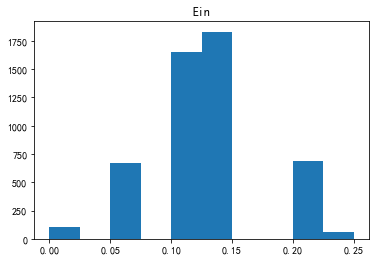

0.12504999999999972


In [5]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

plt.hist(Ein)
plt.title('Ein')
plt.show()

print(sum(Ein)/len(Ein))

#### Problem 18
直接看刚刚计算的$E_{out}$即可

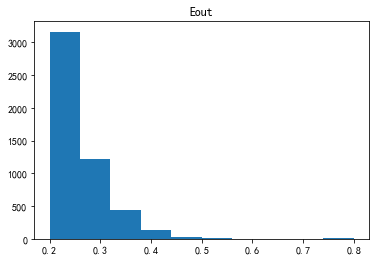

0.2573352820985764


In [6]:
plt.hist(Eout)
plt.title('Eout')
plt.show()

print(sum(Eout)/len(Eout))

#### Problem 19

这题就是上题多维度的情形，我们要对每个维度分别按上一题的方法计算出最佳的$s,\theta$，然后对每个维度的最佳解进行比较，求出全局最佳的$s,\theta$以及维度$dim$，然后按照这个$dim$以及$s,\theta$来预测我们的测试结果。

In [18]:
#预处理函数，返回数据以及维度，注意转换的时候不要转换为int  
def g(file):
    y=[]
    with open(file) as x: 
        for i in x.readlines():
            j=i.strip().split(' ')
            y.append(list(map(float,j)))
        n=len(y[0])-1
    return y,n

#sign(x)
def sign(x):
    if x>0:
        return 1
    else:
        return -1
    
#产生(x,sign(x))
def dat(a):
    b=[]
    for i in range(len(a)):
        b.append(sign(a[i]))
    return b

#预测函数
def h(x,a,b):
    return a*sign(x-b)

#产生(x,h(x))预测数据
def dat1(x,a,b):
    y=[]
    for i in range(len(x)):
        y.append(h(x[i],a,b))
    return y

#产生theta
def Theta(x):
    a=[]
    for i in range(len(x)-1):
        a.append((x[i]+x[i+1])/2.0)
    x=a[0]-1.0
    y=a[-1]+1.0
    a.insert(0,x)
    a.append(y)
    return a

#计算列表a,b中不同元素个数
def cal(a,b):
    x=0
    for i in range(len(a)):
        if a[i]!=b[i]:
            x+=1
    return x

#行转列，方便后续处理
def trans(x):
    a=len(x)
    b=len(x[0])-1
    c=[]
    for i in range(b):
        d=[]
        for j in range(a):
            d.append(x[j][i])
        c.append(d)
    return c

def func(x):
    #数据，维度
    a,b=g(x)
    #记录实际值
    c=[]
    for i in range(len(a)):
        c.append(a[i][-1])
    #转置
    d=trans(a)
    #记录最低错误数
    error3=len(a)
    #记录theta
    theta3=0
    #记录维度
    dim=0
    #记录s
    s3=1
    for i in range(b):
        #记录每个维度的最低错误以及theta
        error1=len(a)
        theta1=0
        #记录s
        s1=1
        #第i个维度
        e=d[i]
        #排序
        data=e[:]
        data.sort()
        #产生theta
        theta=Theta(data)
        for j in [-1,1]:
            for theta2 in theta:
                z=dat1(e,j,theta2)
                error2=cal(c,z)
                if error2<error1:
                    error1=error2
                    theta1=theta2
                    s1=j
        #将第i个维度的最优解error1,theta1,s1和全局最优解比较
        if error1<error3:
            error3=error1
            theta3=theta1
            dim=i
            s3=s1
    #注意维度要加1
    return error3/len(a),theta3,dim+1,s3

In [19]:
train='hw2_train.dat'

error3,theta3,dim,s3=func(train)

print(error3,theta3,dim,s3)

0.25 1.6175000000000002 4 -1


$E_{in}=0.25$，维度为第四个维度，$h_{s;i;θ}(x) = s·sign(x_i - θ)=-sign(x_i-1.6175)$

#### Problem 20

根据之前计算的$s,\theta,dim$来预测结果并计算误差

In [25]:
test='hw2_test.dat'

#读取数据
test,n=g(test)
#数据数量
m=len(test)
#读取目标值
result=[]
for i in range(m):
    result.append(test[i][-1])
#行转列
test1=trans(test)
#计算预测结果，注意这里选择我们之前的维度
predict=dat1(test1[dim-1],s3,theta3)
#计算误差
error=cal(result,predict)
print(error*1.0/m)

0.355


#### Problem 21

考虑$N$个元素的点集，点集中最多有$k-1$个$-1$，那么这样的点集有$\sum_{i=0}^{k-1}\binom N i$种。考虑$k$个元素的子集，然么$(-1,-1...-1)$(全为$-1$的情形)必然无法被表出，因为最多有$k-1$个点为$-1$。那么由$B(N,k)$的定义知
$$
B(N, k) \ge\sum_{i=0}^{k-1}\binom N i
$$


#### 总结
这部分编程题做的比较早，其实解的有点啰嗦，理论题部分有些当时不怎么会，这次又做了一遍算是基本理清楚了。